# T2

### Análisis Exploratorio de Datos (EDA)

In [3]:
# Librerías necesarias
import pandas as pd

data = pd.read_csv('C:/Users/christianr/Documents/GitHub/EndomorfismoII_2024_2/01_SVM/clientes.csv', delimiter=",")
data.head(10)

,F1,F2,F3,F4,TipoCliente
0,-1.643542,1.101120,-4.198437,0.750975,1
1,0.054575,3.804761,-1.171671,-4.051367,2
2,-2.103886,2.175378,-1.461801,-2.003572,1
3,-2.137324,2.583558,-1.809667,-3.247094,1
4,-1.980847,1.686074,-2.495335,-1.729680,1
5,-1.637785,-1.806184,-2.470138,-2.684397,0
6,-0.829239,2.980031,-1.616481,-1.771494,1
7,-2.630472,-2.251309,-0.982120,-0.605393,0
8,3.043773,2.052709,0.273175,-2.392143,2
9,0.616312,5.497376,-0.606788,-0.528252,2


In [4]:
data.describe()

,F1,F2,F3,F4,TipoCliente
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,-0.541045,0.575254,-2.194482,-1.860992,1.000000
std,2.190260,2.164432,1.091591,1.255304,0.819232
min,-4.166879,-3.472688,-5.976652,-5.886520,0.000000
25%,-2.109418,-1.454566,-2.853994,-2.681568,0.000000
50%,-1.332474,1.022149,-2.152081,-1.839338,1.000000
75%,1.247968,2.258996,-1.510175,-1.011330,2.000000
max,5.485439,5.497376,0.312915,1.514559,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F1           150 non-null    float64
 1   F2           150 non-null    float64
 2   F3           150 non-null    float64
 3   F4           150 non-null    float64
 4   TipoCliente  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
# Clase (Característica Primaria)
# F1 F2 F3 F4 -> Datos numéricos continuos(NUMÉRICOS) (1.12,1.1256775, 1.15, 2.456, 4.2345) -> Variables independientes
# TipoCliente -> Datos numéricos discretos (CATEGÓRICOS) (0,1,2) (niños, jóvenes, adultos) dummies -> Variable dependiente 
print('Ejemplo de variable continua:')
print(data['F1'].unique())
data['TipoCliente'].unique()

Ejemplo de variable continua:
[-1.64354225  0.05457465 -2.10388618 -2.13732402 -1.98084657 -1.63778459
 -0.82923874 -2.63047244  3.04377256  0.616312   -2.62932957 -1.28670564
  1.92265204 -1.01426071  1.27521707 -2.20997717 -1.53868343 -1.48153659
 -1.54385725 -1.65358312  3.20502598 -2.10048702 -1.18899486  1.25537304
 -1.76561381 -2.26217505  2.57754043 -1.78728501 -2.81822399  3.50389766
  2.37244468 -2.11365807 -1.01978843 -0.51499519  2.9364645  -0.98058177
 -2.6528389  -1.90360989  1.44062024 -1.85389903 -1.45454377  4.03287121
 -2.87725134  3.42985265 -1.48583238 -0.9591283  -1.72245816  2.774688
 -2.96892617  2.07221264 -0.11885188 -0.94682322 -2.08507996  1.54593965
 -0.7017875  -1.86831394  4.66599507  1.00558901 -2.63721442 -1.36165351
 -1.28662159 -2.0511899  -1.61384994  0.60724619 -2.43878016 -2.08923434
  0.92239987 -2.13874635 -2.46143977 -0.85382907  2.4067393  -1.06627503
 -2.58156513 -1.2572032  -2.56253661  2.77589118 -2.5430092  -2.05520498
 -1.71857504 -1.7438311

array([1, 2, 0], dtype=int64)

<Axes: >

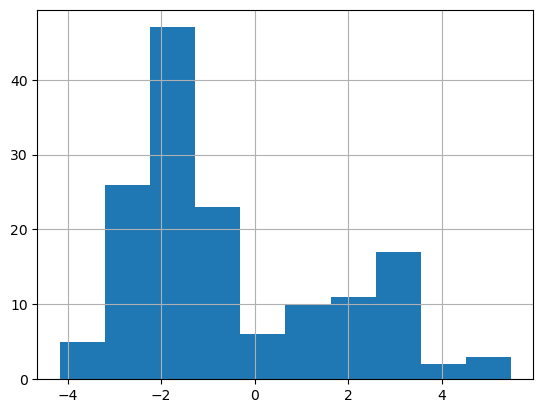

In [7]:
# Análisis de distribución
data['F1'].hist()

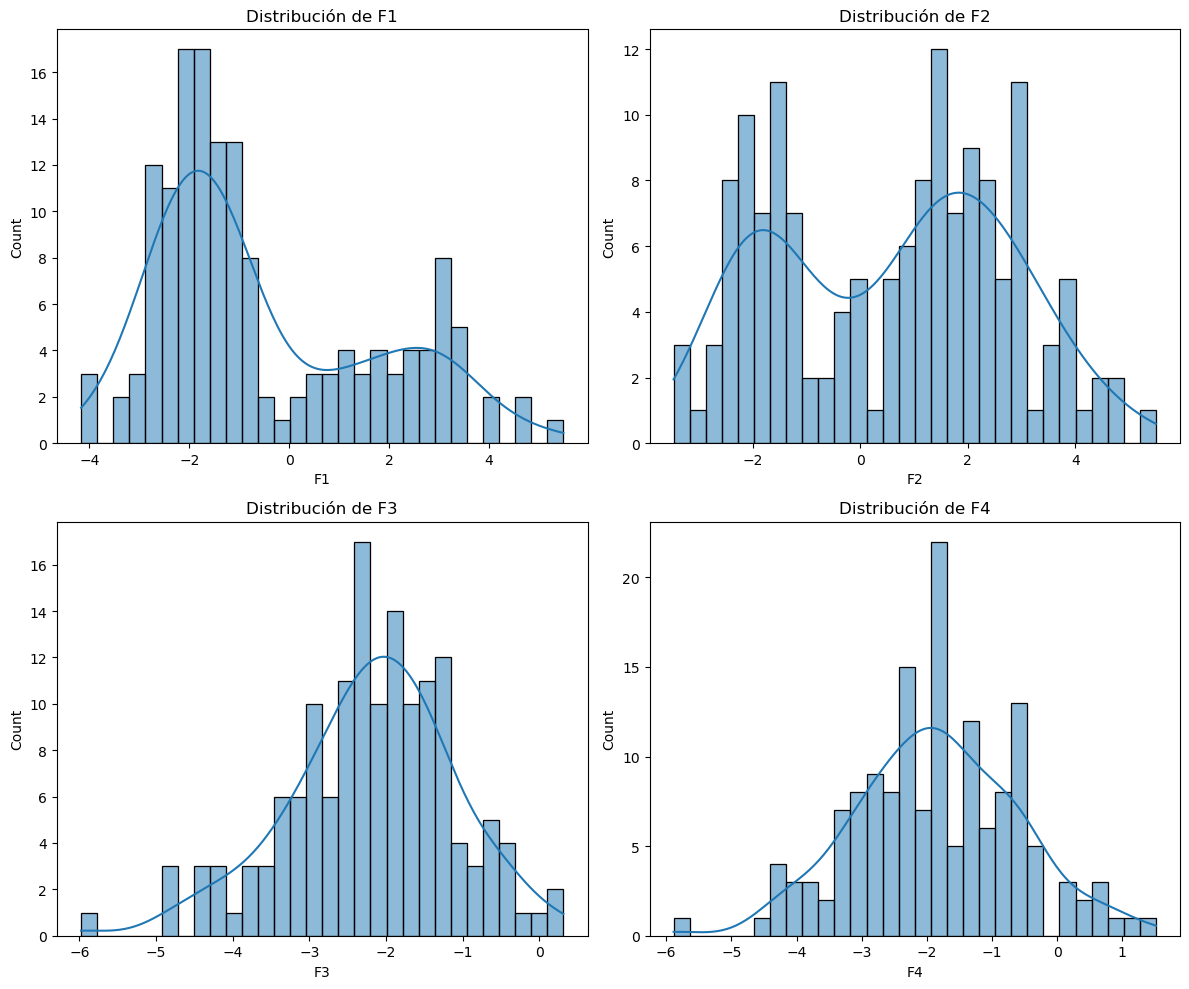

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

for i, col in enumerate(data.columns[:-1],1):
    plt.subplot(2,2,i)
    sns.histplot(data[col],kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


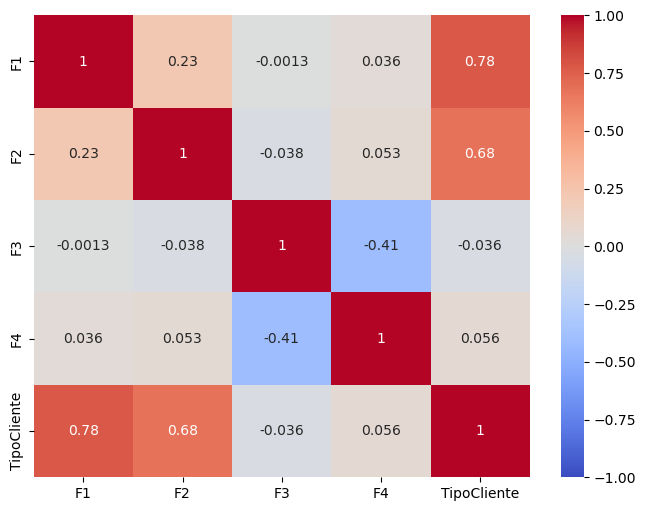

In [12]:
# Análisis de correlación
# más atención - suben calificaciones (X1, X2)
# menos atención - bajar calificaciones
data.corr()

plt.figure(figsize=(8,6))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# LA CORRELACIÓN NO IMPLICA CAUSALIDAD
plt.show()

#### Conclusiones (EDA)
- Son 150 registros (filas)
- Existen 3 clases (0,1,2)
- No existen datos faltantes ni nulos (0)
- Los datos están sesgados (Preprocesar los datos -> Normalizar)
- Variables F1 y F2 son las más influyentes con TipoCliente

### Preprocesamiento 

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Quitar la variable dependiente (target)
X = data.drop('TipoCliente', axis=1)

scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)

X_normalizado = pd.DataFrame(X_normalizado, columns=X.columns)


### Generación del Modelo

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#Variables independientes
# X_normalizado
# Variable dependiente
y = data['TipoCliente']

# Segmentar nuestro conjunto de datos (Entrenamiento - 70% 80%    -    Validación 30% 20%)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state= 42)

modelo = SVC(kernel='linear', random_state=42) # Generación del modelo - ajuste
modelo.fit(X_train, y_train) # Entrenamiento



SVC(kernel='linear', random_state=42)

In [28]:
#Validación
import numpy as np
y_pred = modelo.predict(X_test)

diferencias = np.sum(y_pred != y_test)
print(f'Número de diferencias: {diferencias}')

# Exactitud  Total de aciertos / Total de datos
print(f'Exactitud: {(y_pred.size-diferencias)/y_pred.size}')

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_pred, y_test)
print(exactitud)

Número de diferencias: 3
Exactitud: 0.9333333333333333
0.9333333333333333
